In [1]:
from implicit_filter import NemoNumpyFilter # When GPU is aviable use NemoCupyFilter

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import math

# Load NEMO data

---

Remember to exclude redundant data at the borders

In [2]:
s = xr.open_dataset("../../AWI/data/FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_U.nc")
ttu = s.vozocrtx.isel(time_counter=0, depthu=0, y=slice(None, -2), x=slice(None, -2)).transpose("x", "y").values
s = xr.open_dataset("../../AWI/data/FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_V.nc")
ttv = s.vomecrty.isel(time_counter=0, depthv=0, y=slice(None, -2), x=slice(None, -2)).transpose("x", "y").values

### and NEMO mesh file path

In [3]:
mesh_file = "../../AWI/data/mesh_mask.nc"

# Prepare the filter

---

Select vertical level (vl) that you want to use. This is necessary if you want to take into account partially filled cells and changes in topography. Otherwise you can set vertical level to 0 and the filter will use surface land mask to construct filter. 

In [4]:
filter = NemoNumpyFilter()
filter.prepare_from_file(file=mesh_file, vl=0) 

### Saving auxiliary arrays to file is supported as well

In [5]:
filter.save_to_file("../nemo_cash")

### Load it later 

In [6]:
filter = NemoNumpyFilter.load_from_file("../nemo_cash.npz")

# Filtering

---

### First define wavelength

In [7]:
dxm = 25 # Mesh resolution
Kc = np.array([2, 4, 5, 6, 8, 10, 12, 16, 50]) * dxm
Kc = 2 * math.pi / Kc

### Apply filter

In [8]:
ttus, ttvs = filter.compute_velocity(1, Kc[-1], ttu, ttv) # Velocities are transformed to T cells

### Before

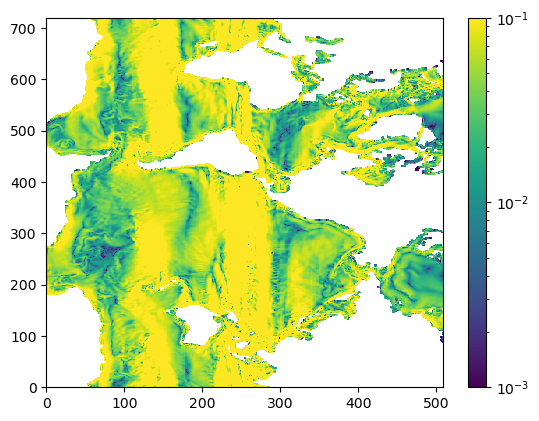

In [9]:
import matplotlib as mpl

plt.pcolor(np.sqrt(np.square(ttu) + np.square(ttv)), norm=mpl.colors.LogNorm(vmin=1e-3,vmax=1e-1))
plt.figsize=(20, 15)
plt.colorbar()

### After

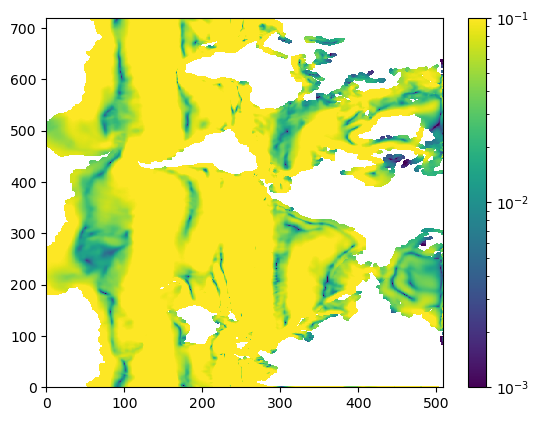

In [10]:
plt.pcolor(np.sqrt(np.square(ttus) + np.square(ttvs)), norm=mpl.colors.LogNorm(vmin=1e-3,vmax=1e-1))
plt.figsize=(20, 15)
plt.colorbar()